# cuML - RAPIDS




## Installation

In [ ]:
# Run this cell in case of errors in the regression benchmark below
! git clone https://github.com/rapidsai/rapidsai-csp-utils.git
! pip install cudf-cu12==23.08 cuml-cu12==23.08 aiohttp --extra-index-url=https://pypi.nvidia.com

Cloning into 'rapidsai-csp-utils'...
remote: Enumerating objects: 438, done.
remote: Counting objects: 100% (169/169), done.
remote: Compressing objects: 100% (115/115), done.
remote: Total 438 (delta 121), reused 57 (delta 54), pack-reused 269
Receiving objects: 100% (438/438), 118.31 KiB | 5.38 MiB/s, done.
Resolving deltas: 100% (223/223), done.
Looking in indexes: https://pypi.org/simple, https://pypi.nvidia.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 503.2/503.2 MB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 961.8/961.8 MB 879.2 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.6/23.6 MB 58.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 582.4/582.4 kB 50.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 36.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.9/34.9 MB 15.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 86.2 MB/s eta 0:00:00
     ━━

In [1]:
# Run this cell in case the developers have fixed the regression benchmark issue
! git clone https://github.com/rapidsai/rapidsai-csp-utils.git
! pip3 install --upgrade pip
! python rapidsai-csp-utils/colab/pip-install.py

Cloning into 'rapidsai-csp-utils'...
remote: Enumerating objects: 490, done.
remote: Counting objects: 100% (221/221), done.
remote: Compressing objects: 100% (130/130), done.
remote: Total 490 (delta 149), reused 124 (delta 91), pack-reused 269 (from 1)
Receiving objects: 100% (490/490), 136.70 KiB | 676.00 KiB/s, done.
Resolving deltas: 100% (251/251), done.
  Using cached pip-24.2-py3-none-any.whl.metadata (3.6 kB)
Using cached pip-24.2-py3-none-any.whl (1.8 MB)
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
Installing the rest of the RAPIDS 24.4.* libraries
Looking in indexes: https://pypi.org/simple, https://pypi.nvidia.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 GB 26.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 GB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.8/137.8 MB 68.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
num = 10000
w = 2.0
x = np.random.normal(size = (num)) # Normal distribution

In [4]:
x, x.shape, w

(array([ 1.45756544, -0.4763975 ,  0.73262359, ...,  0.78949235,
         0.02548002,  0.61880566]),
 (10000,),
 2.0)

In [5]:
b = 1.0
y = w * x + b

In [6]:
y, y.shape, b

(array([3.91513088, 0.04720501, 2.46524717, ..., 2.5789847 , 1.05096004,
        2.23761133]),
 (10000,),
 1.0)

In [7]:
# Add some noise
noise = np.random.normal(scale=2.0, size=(num))
y_noisy = y + noise
y_noisy

array([2.89290365, 0.50775359, 2.04153469, ..., 3.51693426, 4.30985605,
       4.01307265])

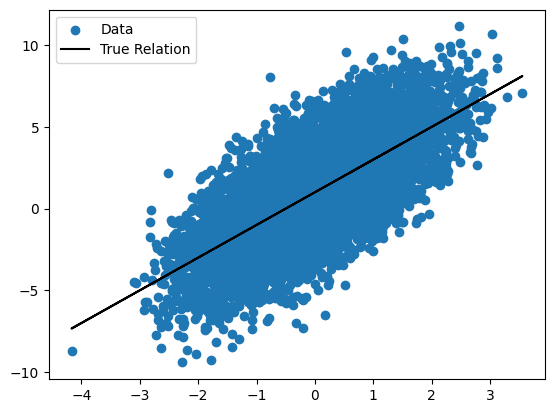

In [8]:
plt.scatter(x, y_noisy, label = "Data")
plt.plot(x, y, color = 'black', label = 'True Relation')
plt.legend();

## Simple linear regression


### Using scikit-Learn


In [9]:
import sklearn
from sklearn.linear_model import LinearRegression
print(sklearn.__version__)

1.3.2


In [10]:
linear_regression = LinearRegression()
type(linear_regression)

sklearn.linear_model._base.LinearRegression

In [11]:
x.shape

(10000,)

In [12]:
np.expand_dims(x, 1).shape # Linear regression requires a matrix (for X)

(10000, 1)

In [13]:
linear_regression.fit(np.expand_dims(x, 1), y_noisy)

LinearRegression()

In [14]:
inputs = np.linspace(start = -5, stop = 5, num = 1_000_000)

In [15]:
inputs

array([-5.     , -4.99999, -4.99998, ...,  4.99998,  4.99999,  5.     ])

In [16]:
outputs = linear_regression.predict(np.expand_dims(inputs, 1))
outputs

array([-9.15986549, -9.15984524, -9.15982499, ..., 11.0907932 ,
       11.09081345, 11.0908337 ])

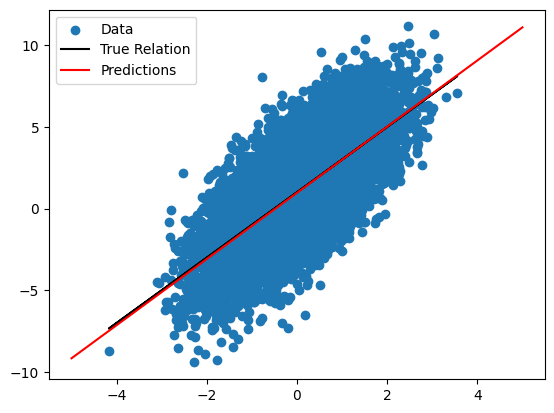

In [17]:
plt.scatter(x, y_noisy, label = "Data")
plt.plot(x, y, color = 'black', label = "True Relation")         # True values
plt.plot(inputs, outputs, color = 'red', label = 'Predictions')  # Predictions
plt.legend();

### Using cuML

In [18]:
import cudf
print(cudf.__version__) # 23.08.00

24.04.01


In [19]:
df = cudf.DataFrame({"x": x, "y": y_noisy})
df

,x,y
0,1.457565,2.892904
1,-0.476397,0.507754
2,0.732624,2.041535
3,-1.926901,-1.446847
4,2.237175,4.201820
...,...,...
9995,-1.034364,-0.899426
9996,-1.220547,-2.284052
9997,0.789492,3.516934
9998,0.025480,4.309856


In [20]:
type(df)

cudf.core.dataframe.DataFrame

In [21]:
import cuml
print(cuml.__version__)
from cuml.linear_model import LinearRegression as LinearRegressionGPU

24.04.00


In [22]:
df["x"]

0       1.457565
1      -0.476397
2       0.732624
3      -1.926901
4       2.237175
          ...   
9995   -1.034364
9996   -1.220547
9997    0.789492
9998    0.025480
9999    0.618806
Name: x, Length: 10000, dtype: float64

In [23]:
type(y_noisy), type(x)

(numpy.ndarray, numpy.ndarray)

In [24]:
import cupy as cp
linear_regression_gpu = LinearRegressionGPU()
linear_regression_gpu.fit(cp.expand_dims(cp.array(df['x']), 1), cp.array(y_noisy))

/usr/local/lib/python3.10/dist-packages/cuml/internals/api_decorators.py:382: UserWarning: Starting from version 23.08, the new 'copy_X' parameter defaults to 'True', ensuring a copy of X is created after passing it to fit(), preventing any changes to the input, but with increased memory usage. This represents a change in behavior from previous versions. With `copy_X=False` a copy might still be created if necessary. Explicitly set 'copy_X' to either True or False to suppress this warning.
  return init_func(self, *args, **filtered_kwargs)
/usr/local/lib/python3.10/dist-packages/cuml/internals/api_decorators.py:190: UserWarning: Changing solver from 'eig' to 'svd' as eig solver does not support training data with 1 column currently.
  return func(*args, **kwargs)


LinearRegression()

In [25]:
df_cudf = cudf.DataFrame({'inputs': inputs})
df_cudf

,inputs
0,-5.00000
1,-4.99999
2,-4.99998
3,-4.99997
4,-4.99996
...,...
999995,4.99996
999996,4.99997
999997,4.99998
999998,4.99999


In [26]:
type(df_cudf)

cudf.core.dataframe.DataFrame

In [27]:
outputs_gpu = linear_regression_gpu.predict(df_cudf[["inputs"]])

In [28]:
type(outputs_gpu)

cupy.ndarray

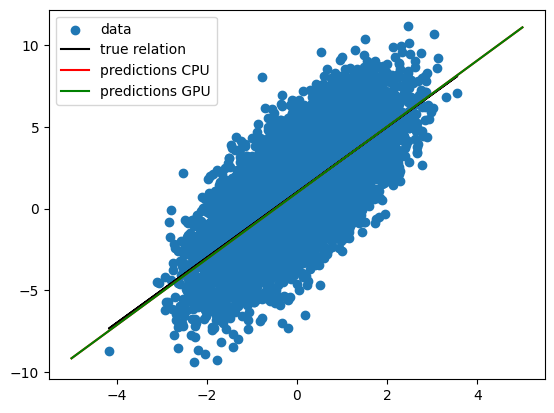

In [29]:
plt.scatter(x, y_noisy, label = "data")
plt.plot(x, y, color = 'black', label = "true relation")
plt.plot(inputs, outputs, color = 'red', label = 'predictions CPU')
plt.plot(inputs, outputs_gpu.get(), color = "green", label = "predictions GPU")
plt.legend();

## Ridge Regression


- Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

In [30]:
from sklearn import datasets
import numpy as np
diabetes = datasets.load_diabetes()

In [31]:
type(diabetes)

sklearn.utils._bunch.Bunch

In [32]:
diabetes

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [33]:
diabetes['data'].shape

(442, 10)

In [34]:
diabetes['target'].shape

(442,)

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, test_size=0.2)

In [36]:
X_train.shape, y_train.shape

((353, 10), (353,))

In [37]:
X_test.shape, y_test.shape

((89, 10), (89,))

In [38]:
from sklearn.linear_model import Ridge as skRidge

In [39]:
type(X_train), type(y_train)

(numpy.ndarray, numpy.ndarray)

In [40]:
alpha = np.array([1.0])
fit_intercept = True

ridge = skRidge(alpha = alpha, fit_intercept = fit_intercept, solver = "cholesky")
ridge.fit(X_train, y_train)

Ridge(alpha=array([1.]), solver='cholesky')

> cuML

In [41]:
from cuml import Ridge as cuRidge

In [42]:
X_train_cp = cp.array(X_train)
y_train_cp = cp.array(y_train)

In [43]:
type(X_train_cp), type(y_train_cp)

(cupy.ndarray, cupy.ndarray)

In [44]:
cuml_ridge = cuRidge(alpha = alpha, fit_intercept = fit_intercept, solver = "eig")
cuml_ridge.fit(X_train_cp, y_train_cp)

Ridge()

> cuML documentation: https://docs.rapids.ai/api/cuml/stable/api.html#regression-and-classification

## Predictions and evaluation

In [45]:
X_test.shape, y_test.shape

((89, 10), (89,))

In [46]:
type(X_test), type(y_test)

(numpy.ndarray, numpy.ndarray)

In [47]:
print('sklearn: ' + str(ridge.score(X_test, y_test)))

sklearn: 0.556787388960942


In [48]:
print('cuML: ' + str(cuml_ridge.score(cp.array(X_test), cp.array(y_test))))

cuML: 0.556787388960942


## Hyperparameter tuning

- Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [49]:
from sklearn.model_selection import GridSearchCV

In [50]:
np.logspace(-3, -1, 10) # range of N values from 10^-3 to 10^-1

array([0.001     , 0.0016681 , 0.00278256, 0.00464159, 0.00774264,
       0.0129155 , 0.02154435, 0.03593814, 0.05994843, 0.1       ])

In [51]:
params = {'alpha': np.logspace(-3, -1, 10)}
params

{'alpha': array([0.001     , 0.0016681 , 0.00278256, 0.00464159, 0.00774264,
        0.0129155 , 0.02154435, 0.03593814, 0.05994843, 0.1       ])}

In [52]:
grid = GridSearchCV(ridge, params, scoring="r2")
grid.fit(X_train, y_train)

GridSearchCV(estimator=Ridge(alpha=array([1.]), solver='cholesky'),
             param_grid={'alpha': array([0.001     , 0.0016681 , 0.00278256, 0.00464159, 0.00774264,
       0.0129155 , 0.02154435, 0.03593814, 0.05994843, 0.1       ])},
             scoring='r2')

In [53]:
grid.best_params_

{'alpha': 0.05994842503189409}

In [54]:
grid.best_score_

0.459016577490128

In [55]:
grid.best_params_["alpha"]

0.05994842503189409

In [56]:
ridge = skRidge(alpha = grid.best_params_["alpha"], fit_intercept=fit_intercept, solver = "cholesky")
ridge.fit(X_train, y_train)

Ridge(alpha=0.05994842503189409, solver='cholesky')

### Hyperparameters in cuML

# NOTE: GridSearchCV is NOT yet supported by cuML, so we have to use the sklearn version.

In [57]:
cuml_grid = GridSearchCV(cuml_ridge, params, scoring="r2")
cuml_grid.fit(X_train, y_train)
cuml_grid.best_params_, cuml_grid.best_score_

({'alpha': 0.05994842503189409}, 0.4590165774901278)

In [58]:
cuml_ridge = cuRidge(alpha=cuml_grid.best_params_['alpha'], fit_intercept=fit_intercept, solver='eig')
cuml_ridge.fit(X_train_cp, y_train_cp)

Ridge()

# Performance comparison

This automatically performs all of the comparison calculations to Pandas/Sklearn on CPU.

- Documentation: https://github.com/rapidsai/cuml/blob/7d86042b8/python/cuml/benchmark/runners.py#L56

In [59]:
from cuml.benchmark.runners import SpeedupComparisonRunner
from cuml.benchmark.algorithms import algorithm_by_name

In [60]:
import pandas as pd

In [61]:
num_reps = 3
input_type = 'numpy'

dataset_neighborhoods = 'blobs'              # KNN
dataset_classification = 'classification'    # Classification
dataset_regression = 'regression'            # Regression

In [62]:
for x in range(14, 17):
  print(x)

14
15
16


In [63]:
2 ** 14, 2 ** 15, 2 ** 16

(16384, 32768, 65536)

In [64]:
benchmark_results = []
row_sizes = [2**x for x in range(14, 17)]
row_sizes # number of rows

[16384, 32768, 65536]

In [66]:
features = [32, 256] # number of columns
features

[32, 256]

In [67]:
# Create and return a small dictionary of the results
def dic_result (algorithm, runner, result):
  result["algo"] = algorithm
  result["dataset_name"] = runner.dataset_name
  result["input_type"] = runner.input_type
  return result

In [68]:
# Calls the runner and creates the result dict
def benchmark (algorithm, runner, verbose=True, run_cpu=True, **kwargs):
  results = runner.run(algorithm_by_name(algorithm), verbose=verbose, run_cpu=run_cpu, **kwargs)
  results = [ dic_result (algorithm, runner, result) for result in results ]
  benchmark_results.extend(results)

## Linear regression

In [69]:
runner = SpeedupComparisonRunner(bench_rows=row_sizes,
                                 bench_dims=features,
                                 dataset_name=dataset_regression,
                                 input_type=input_type,
                                 n_reps=num_reps)

In [70]:
benchmark("LinearRegression", runner)

/usr/local/lib/python3.10/dist-packages/cuml/internals/api_decorators.py:382: UserWarning: Starting from version 23.08, the new 'copy_X' parameter defaults to 'True', ensuring a copy of X is created after passing it to fit(), preventing any changes to the input, but with increased memory usage. This represents a change in behavior from previous versions. With `copy_X=False` a copy might still be created if necessary. Explicitly set 'copy_X' to either True or False to suppress this warning.
  return init_func(self, *args, **filtered_kwargs)


LinearRegression (n_samples=16384, n_features=32) [cpu=0.010603666305541992, gpu=0.003860950469970703, speedup=2.7463875509447946]


/usr/local/lib/python3.10/dist-packages/cuml/internals/api_decorators.py:382: UserWarning: Starting from version 23.08, the new 'copy_X' parameter defaults to 'True', ensuring a copy of X is created after passing it to fit(), preventing any changes to the input, but with increased memory usage. This represents a change in behavior from previous versions. With `copy_X=False` a copy might still be created if necessary. Explicitly set 'copy_X' to either True or False to suppress this warning.
  return init_func(self, *args, **filtered_kwargs)


LinearRegression (n_samples=16384, n_features=256) [cpu=0.17512035369873047, gpu=0.015105247497558594, speedup=11.59334553949113]
LinearRegression (n_samples=32768, n_features=32) [cpu=0.021131277084350586, gpu=0.005251646041870117, speedup=4.023743587415445]


/usr/local/lib/python3.10/dist-packages/cuml/internals/api_decorators.py:382: UserWarning: Starting from version 23.08, the new 'copy_X' parameter defaults to 'True', ensuring a copy of X is created after passing it to fit(), preventing any changes to the input, but with increased memory usage. This represents a change in behavior from previous versions. With `copy_X=False` a copy might still be created if necessary. Explicitly set 'copy_X' to either True or False to suppress this warning.
  return init_func(self, *args, **filtered_kwargs)
/usr/local/lib/python3.10/dist-packages/cuml/internals/api_decorators.py:382: UserWarning: Starting from version 23.08, the new 'copy_X' parameter defaults to 'True', ensuring a copy of X is created after passing it to fit(), preventing any changes to the input, but with increased memory usage. This represents a change in behavior from previous versions. With `copy_X=False` a copy might still be created if necessary. Explicitly set 'copy_X' to either

LinearRegression (n_samples=32768, n_features=256) [cpu=0.3985939025878906, gpu=0.024817943572998047, speedup=16.060714354333584]


/usr/local/lib/python3.10/dist-packages/cuml/internals/api_decorators.py:382: UserWarning: Starting from version 23.08, the new 'copy_X' parameter defaults to 'True', ensuring a copy of X is created after passing it to fit(), preventing any changes to the input, but with increased memory usage. This represents a change in behavior from previous versions. With `copy_X=False` a copy might still be created if necessary. Explicitly set 'copy_X' to either True or False to suppress this warning.
  return init_func(self, *args, **filtered_kwargs)


LinearRegression (n_samples=65536, n_features=32) [cpu=0.04303455352783203, gpu=0.00833439826965332, speedup=5.163486569213605]


/usr/local/lib/python3.10/dist-packages/cuml/internals/api_decorators.py:382: UserWarning: Starting from version 23.08, the new 'copy_X' parameter defaults to 'True', ensuring a copy of X is created after passing it to fit(), preventing any changes to the input, but with increased memory usage. This represents a change in behavior from previous versions. With `copy_X=False` a copy might still be created if necessary. Explicitly set 'copy_X' to either True or False to suppress this warning.
  return init_func(self, *args, **filtered_kwargs)


LinearRegression (n_samples=65536, n_features=256) [cpu=0.7838873863220215, gpu=0.03503870964050293, speedup=22.372039220756246]


For each benchmark:
 * 'cuml_time' - cuML time (GPU)
 * 'cpu_time' - scikit-learn time (CPU)
 * 'speedup' - acceleration factor
 * 'n_samples': number of samples
 * 'n_features' - number of features
 * 'algo' - algorithm
 * 'dataset_name' - dataset

## KMeans

In [71]:
runner = SpeedupComparisonRunner(bench_rows=row_sizes,
                                 bench_dims=features,
                                 dataset_name=dataset_neighborhoods,
                                 input_type=input_type,
                                 n_reps=num_reps)
benchmark("Kmeans", runner)

KMeans (n_samples=16384, n_features=32) [cpu=0.1183009147644043, gpu=0.0439457893371582, speedup=2.69197382840898]
KMeans (n_samples=16384, n_features=256) [cpu=0.4437999725341797, gpu=0.05044674873352051, speedup=8.797394949642939]
KMeans (n_samples=32768, n_features=32) [cpu=0.1877152919769287, gpu=0.06083488464355469, speedup=3.08565213983383]
KMeans (n_samples=32768, n_features=256) [cpu=1.4193522930145264, gpu=0.0716543197631836, speedup=19.80832834231716]
KMeans (n_samples=65536, n_features=32) [cpu=0.2630271911621094, gpu=0.1273205280303955, speedup=2.0658663236089967]
KMeans (n_samples=65536, n_features=256) [cpu=1.9072329998016357, gpu=0.2186572551727295, speedup=8.72247755188826]


## Random Forest

In [72]:
runner = SpeedupComparisonRunner(bench_rows=row_sizes,
                                 bench_dims=features,
                                 dataset_name=dataset_classification,
                                 input_type=input_type,
                                 n_reps=num_reps)
benchmark("RandomForestClassifier", runner)

RandomForestClassifier (n_samples=16384, n_features=32) [cpu=8.765798568725586, gpu=0.23157405853271484, speedup=37.85311111385659]
RandomForestClassifier (n_samples=16384, n_features=256) [cpu=38.96811270713806, gpu=0.3234994411468506, speedup=120.45805262905763]
RandomForestClassifier (n_samples=32768, n_features=32) [cpu=19.905691862106323, gpu=0.28740668296813965, speedup=69.25966945700063]
RandomForestClassifier (n_samples=32768, n_features=256) [cpu=90.52725982666016, gpu=0.45880937576293945, speedup=197.30908871712847]
RandomForestClassifier (n_samples=65536, n_features=32) [cpu=51.96901249885559, gpu=0.4119694232940674, speedup=126.14774194481821]
RandomForestClassifier (n_samples=65536, n_features=256) [cpu=245.17012739181519, gpu=0.7321162223815918, speedup=334.8786980764759]


## Visualizing the results



In [73]:
benchmark_results

[{'cuml_time': 0.003860950469970703,
  'cpu_time': 0.010603666305541992,
  'speedup': 2.7463875509447946,
  'n_samples': 16384,
  'n_features': 32,
  'algo': 'LinearRegression',
  'dataset_name': 'regression',
  'input_type': 'numpy'},
 {'cuml_time': 0.015105247497558594,
  'cpu_time': 0.17512035369873047,
  'speedup': 11.59334553949113,
  'n_samples': 16384,
  'n_features': 256,
  'algo': 'LinearRegression',
  'dataset_name': 'regression',
  'input_type': 'numpy'},
 {'cuml_time': 0.005251646041870117,
  'cpu_time': 0.021131277084350586,
  'speedup': 4.023743587415445,
  'n_samples': 32768,
  'n_features': 32,
  'algo': 'LinearRegression',
  'dataset_name': 'regression',
  'input_type': 'numpy'},
 {'cuml_time': 0.024817943572998047,
  'cpu_time': 0.3985939025878906,
  'speedup': 16.060714354333584,
  'n_samples': 32768,
  'n_features': 256,
  'algo': 'LinearRegression',
  'dataset_name': 'regression',
  'input_type': 'numpy'},
 {'cuml_time': 0.00833439826965332,
  'cpu_time': 0.0430345

In [74]:
df = pd.DataFrame(benchmark_results)
df

,cuml_time,cpu_time,speedup,n_samples,n_features,algo,dataset_name,input_type
0,0.003861,0.010604,2.746388,16384,32,LinearRegression,regression,numpy
1,0.015105,0.175120,11.593346,16384,256,LinearRegression,regression,numpy
2,0.005252,0.021131,4.023744,32768,32,LinearRegression,regression,numpy
3,0.024818,0.398594,16.060714,32768,256,LinearRegression,regression,numpy
4,0.008334,0.043035,5.163487,65536,32,LinearRegression,regression,numpy
5,0.035039,0.783887,22.372039,65536,256,LinearRegression,regression,numpy
6,0.043946,0.118301,2.691974,16384,32,Kmeans,blobs,numpy
7,0.050447,0.443800,8.797395,16384,256,Kmeans,blobs,numpy
8,0.060835,0.187715,3.085652,32768,32,Kmeans,blobs,numpy
9,0.071654,1.419352,19.808328,32768,256,Kmeans,blobs,numpy


In [75]:
def plot_speedup(df, algorithm):
  df = df.loc[df["algo"] == algorithm]
  df = df.pivot(index = "n_samples", columns = "n_features", values = "speedup")
  axes = df.plot.bar(title = "Acceleration using %s" % algorithm, rot = 0)

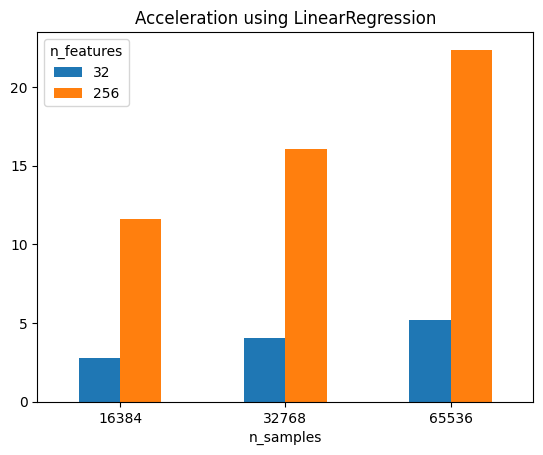

In [76]:
plot_speedup(df, "LinearRegression")

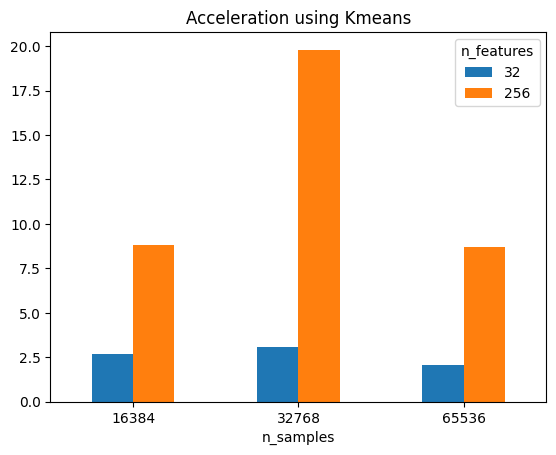

In [77]:
plot_speedup(df, "Kmeans")

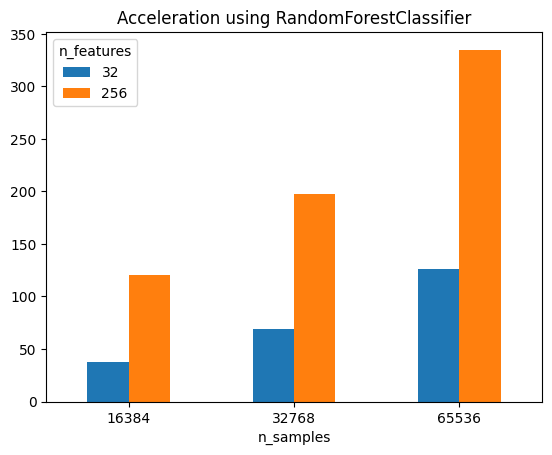

In [78]:
plot_speedup(df, "RandomForestClassifier")

In [79]:
def plot_speedup_multi(df):
  df = df[["algo", "n_samples", "speedup"]].groupby(["algo", "n_samples"]).mean()
  df.plot.bar()

In [81]:
df

,cuml_time,cpu_time,speedup,n_samples,n_features,algo,dataset_name,input_type
0,0.003861,0.010604,2.746388,16384,32,LinearRegression,regression,numpy
1,0.015105,0.175120,11.593346,16384,256,LinearRegression,regression,numpy
2,0.005252,0.021131,4.023744,32768,32,LinearRegression,regression,numpy
3,0.024818,0.398594,16.060714,32768,256,LinearRegression,regression,numpy
4,0.008334,0.043035,5.163487,65536,32,LinearRegression,regression,numpy
5,0.035039,0.783887,22.372039,65536,256,LinearRegression,regression,numpy
6,0.043946,0.118301,2.691974,16384,32,Kmeans,blobs,numpy
7,0.050447,0.443800,8.797395,16384,256,Kmeans,blobs,numpy
8,0.060835,0.187715,3.085652,32768,32,Kmeans,blobs,numpy
9,0.071654,1.419352,19.808328,32768,256,Kmeans,blobs,numpy


In [84]:
df[["algo", "n_samples", "speedup"]].groupby(["algo", "n_samples"]).mean()

speedup
algo                   n_samples            
Kmeans                 16384        5.744684
                       32768       11.446990
                       65536        5.394172
LinearRegression       16384        7.169867
                       32768       10.042229
                       65536       13.767763
RandomForestClassifier 16384       79.155582
                       32768      133.284379
                       65536      230.513220

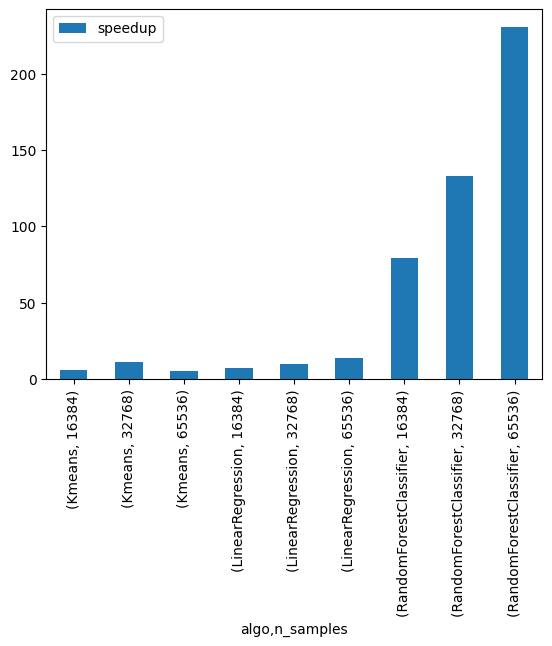

In [80]:
plot_speedup_multi(df)